In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ident_df=pd.read_csv("summarize_identification_PSM.csv")
print(ident_df.shape)
ident_df.head()

(1215, 11)


,Organism,Dataset,fasta_type,REF,DREF,OC1,DOC1,OC5,DOC5,CON,DCON
0,Arthrobacter_sp_FB24,Arthro_009-LTQFT3_04Oct05_Andro_0705-06,msgfplus,6042,276,0,0,0,0,38,1
1,Arthrobacter_sp_FB24,Arthro_009-LTQFT3_04Oct05_Andro_0705-06,annotated,6050,283,0,0,0,0,38,3
2,Arthrobacter_sp_FB24,Arthro_009-LTQFT3_04Oct05_Andro_0705-06,ocelot166,5844,140,61,72,64,60,37,0
3,Arthrobacter_sp_FB24,Arthro_002-LTQFT2_29Sep05_Andro_0705-06,msgfplus,4917,243,0,0,0,0,47,3
4,Arthrobacter_sp_FB24,Arthro_002-LTQFT2_29Sep05_Andro_0705-06,annotated,4894,242,0,0,0,0,47,3


In [3]:
lookup_df=pd.read_csv("../createcatalog/pnnl_lookup.csv")
lookup_df["Organism"]=lookup_df["dir_name"]
print(lookup_df.shape)
lookup_df.head()

(112, 7)


,scientific_name,taxid,dir_name,genome_flag,domain,ftp_basename,Organism
0,Acidiphilium cryptum JF-5,349163.0,Acidiphilium_cryptum_JF-5,0,NaN,NaN,Acidiphilium_cryptum_JF-5
1,Actinosynnema mirum DSM 43827,446462.0,Actinosynnema_mirum_DSM_43827,1,bacteria,GCF_000023245.1_ASM2324v1,Actinosynnema_mirum_DSM_43827
2,Anabaena variabilis,1172.0,Anabaena_variabilis,0,NaN,NaN,Anabaena_variabilis
3,Anaeromyxobacter dehalogenans,161493.0,Anaeromyxobacter_dehalogenans,0,NaN,NaN,Anaeromyxobacter_dehalogenans
4,Anaplasma phagocytophilum,948.0,Anaplasma_phagocytophilium,0,NaN,NaN,Anaplasma_phagocytophilium


add taxid column

In [4]:
df=pd.merge(ident_df, lookup_df, on="Organism",how="left")
df=df[list(ident_df.columns)+["taxid"]]
df["taxid"]=df["taxid"].astype(int)

In [5]:
df.head()

,Organism,Dataset,fasta_type,REF,DREF,OC1,DOC1,OC5,DOC5,CON,DCON,taxid
0,Arthrobacter_sp_FB24,Arthro_009-LTQFT3_04Oct05_Andro_0705-06,msgfplus,6042,276,0,0,0,0,38,1,290399
1,Arthrobacter_sp_FB24,Arthro_009-LTQFT3_04Oct05_Andro_0705-06,annotated,6050,283,0,0,0,0,38,3,290399
2,Arthrobacter_sp_FB24,Arthro_009-LTQFT3_04Oct05_Andro_0705-06,ocelot166,5844,140,61,72,64,60,37,0,290399
3,Arthrobacter_sp_FB24,Arthro_002-LTQFT2_29Sep05_Andro_0705-06,msgfplus,4917,243,0,0,0,0,47,3,290399
4,Arthrobacter_sp_FB24,Arthro_002-LTQFT2_29Sep05_Andro_0705-06,annotated,4894,242,0,0,0,0,47,3,290399


In [6]:
genome_df=pd.read_csv("/home/mitsuki/altorf/genome/patternanalyze/summarize_count.csv")
genome_df.head()

,taxid,count_real,count_sim
0,429572,0.425893,0.427635
1,1434120,0.463257,0.442056
2,188937,0.448898,0.429019
3,1054217,1.094285,0.843878
4,1434123,0.410412,0.401882


add count_real, count_sim

In [7]:
df=pd.merge(df, genome_df, on="taxid", how="left")
df.head()

,Organism,Dataset,fasta_type,REF,DREF,OC1,DOC1,OC5,DOC5,CON,DCON,taxid,count_real,count_sim
0,Arthrobacter_sp_FB24,Arthro_009-LTQFT3_04Oct05_Andro_0705-06,msgfplus,6042,276,0,0,0,0,38,1,290399,1.040264,0.955156
1,Arthrobacter_sp_FB24,Arthro_009-LTQFT3_04Oct05_Andro_0705-06,annotated,6050,283,0,0,0,0,38,3,290399,1.040264,0.955156
2,Arthrobacter_sp_FB24,Arthro_009-LTQFT3_04Oct05_Andro_0705-06,ocelot166,5844,140,61,72,64,60,37,0,290399,1.040264,0.955156
3,Arthrobacter_sp_FB24,Arthro_002-LTQFT2_29Sep05_Andro_0705-06,msgfplus,4917,243,0,0,0,0,47,3,290399,1.040264,0.955156
4,Arthrobacter_sp_FB24,Arthro_002-LTQFT2_29Sep05_Andro_0705-06,annotated,4894,242,0,0,0,0,47,3,290399,1.040264,0.955156


In [8]:
df["RREF"]=(df["REF"]+1)/(df["DREF"]+1)
df["ROC1"]=(df["OC1"]+1)/(df["DOC1"]+1)
df["ROC5"]=(df["OC5"]+1)/(df["DOC5"]+1)
df["RCON"]=(df["CON"]+1)/(df["DCON"]+1)
df["aveNSRFdiff"]=df["count_real"]-df["count_sim"]

In [9]:
df.head()

,Organism,Dataset,fasta_type,REF,DREF,OC1,DOC1,OC5,DOC5,CON,DCON,taxid,count_real,count_sim,RREF,ROC1,ROC5,RCON,aveNSRFdiff
0,Arthrobacter_sp_FB24,Arthro_009-LTQFT3_04Oct05_Andro_0705-06,msgfplus,6042,276,0,0,0,0,38,1,290399,1.040264,0.955156,21.815884,1.000000,1.000000,19.50,0.085108
1,Arthrobacter_sp_FB24,Arthro_009-LTQFT3_04Oct05_Andro_0705-06,annotated,6050,283,0,0,0,0,38,3,290399,1.040264,0.955156,21.306338,1.000000,1.000000,9.75,0.085108
2,Arthrobacter_sp_FB24,Arthro_009-LTQFT3_04Oct05_Andro_0705-06,ocelot166,5844,140,61,72,64,60,37,0,290399,1.040264,0.955156,41.453901,0.849315,1.065574,38.00,0.085108
3,Arthrobacter_sp_FB24,Arthro_002-LTQFT2_29Sep05_Andro_0705-06,msgfplus,4917,243,0,0,0,0,47,3,290399,1.040264,0.955156,20.155738,1.000000,1.000000,12.00,0.085108
4,Arthrobacter_sp_FB24,Arthro_002-LTQFT2_29Sep05_Andro_0705-06,annotated,4894,242,0,0,0,0,47,3,290399,1.040264,0.955156,20.144033,1.000000,1.000000,12.00,0.085108


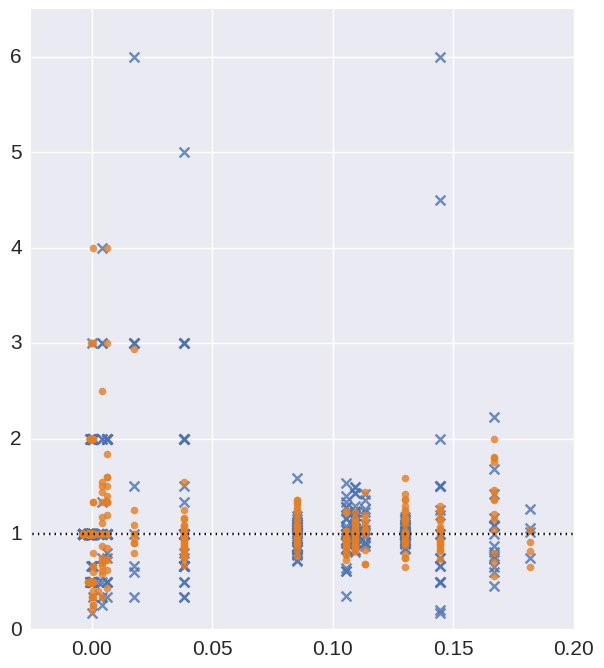

In [43]:
plt.figure(figsize=(7,8), dpi=80)
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.regplot("aveNSRFdiff","ROC1",data=df[df["fasta_type"]=="ocelot166"], fit_reg=False, marker='x', scatter_kws={"s":50}, label=r"$R_{OC1}$")
sns.regplot("aveNSRFdiff","ROC5",data=df[df["fasta_type"]=="ocelot166"], color="#E67E22",fit_reg=False, scatter_kws={"s":30}, label=r"$R_{OC5}$")
plt.xlabel("")
plt.ylabel("")
plt.xlim([-0.025,0.20])
plt.ylim([0,6.5])
plt.tick_params(labelsize=15)
plt.plot([-1,1],[1,1],"k:")
#plt.legend(prop={"size":10})
plt.show()

In [41]:
def myplot(clm):
    plt.figure(figsize=(8,8))
    total=df["fasta_type"]=="ocelot166"
    msk=(df[clm]!=0) | (df['D'+clm]!=0)
    sns.regplot("aveNSRFdiff",'R'+clm,data=df[(df["fasta_type"]=="ocelot166")])
    plt.show()
    print("{0}/{1} datasets are non-zero".format(msk.sum(),total.sum()))
    plt.figure(figsize=(8,8))
    sns.regplot("aveNSRFdiff",'R'+clm,data=df[(df["fasta_type"]=="ocelot166") & msk])
    plt.show()

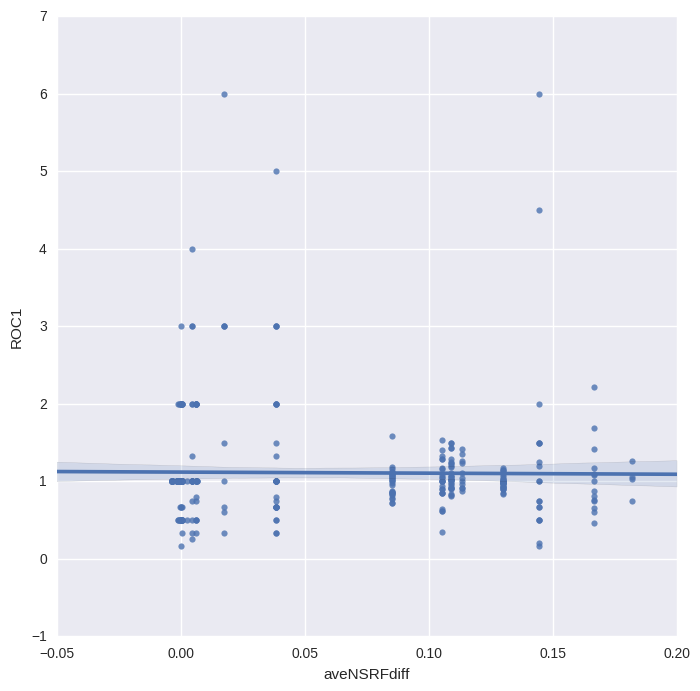

265/405 datasets are non-zero


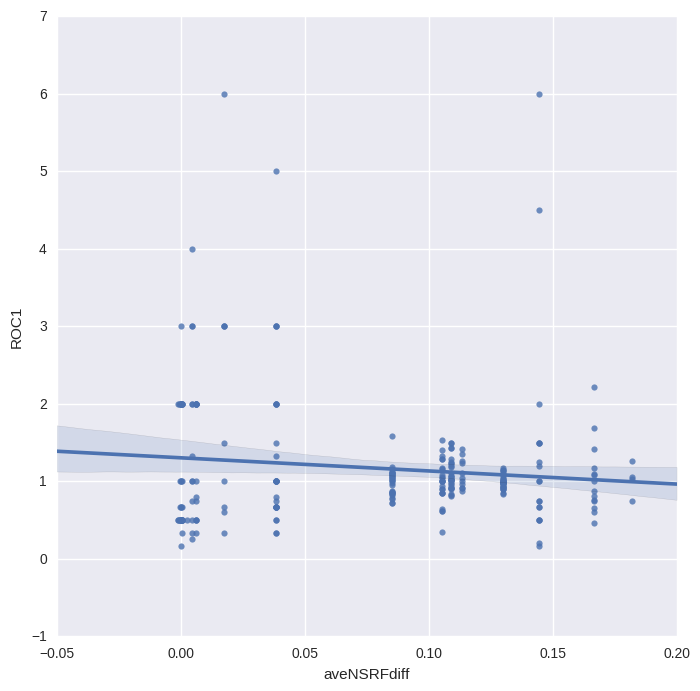

In [42]:
myplot('OC1')

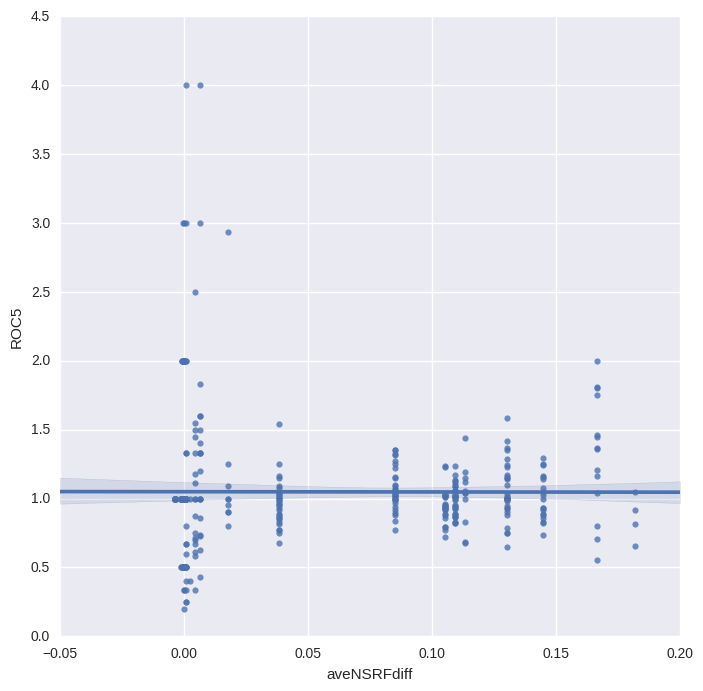

306/405 datasets are non-zero


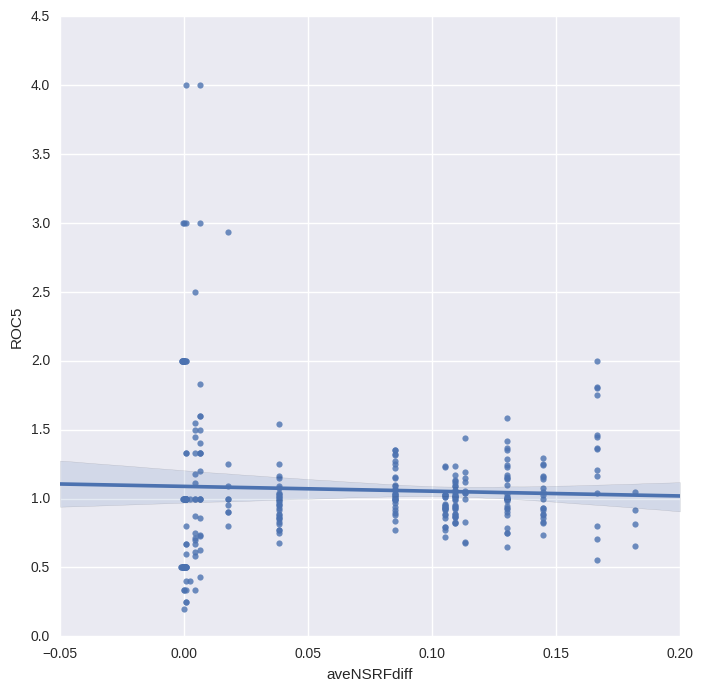

In [43]:
myplot('OC5')

In [47]:
from scipy.stats.mstats import gmean
import numpy as np

In [49]:
a=np.array([2,0.5])
gmean(a)

1.0

In [50]:
taxid_lst=list(set(df["taxid"]))

In [52]:
len(taxid_lst)

23

In [75]:
dct_lst=[]
for taxid in taxid_lst:
    dct={}
    tmp_df=df[(df["taxid"]==taxid) & (df["fasta_type"]=="ocelot166")]
    mskOC1=(df["OC1"]!=0) | (df["DOC1"]!=0)
    
    dct["#sample"]=tmp_df.shape[0]
    dct["aveNSRFdiff"]=tmp_df["aveNSRFdiff"].iloc[0]
    dct["gmean_ROC1"]=gmean(tmp_df["ROC1"])
    mskOC1=(tmp_df["OC1"]!=0) | (tmp_df["DOC1"]!=0)
    dct["#sample_mskOC1"]=mskOC1.sum()
    if(mskOC1.sum()>0):
        dct["gmean_ROC1_msk"]=gmean(tmp_df[mskOC1]["ROC1"])
    else:
        dct["gmean_ROC1_msk"]=-1
    dct["gmean_ROC5"]=gmean(tmp_df["ROC5"])
    mskOC5=(tmp_df["OC5"]!=0) | (tmp_df["DOC5"]!=0)
    dct["#sample_mskOC5"]=mskOC5.sum()
    if (mskOC5.sum()>0):
        dct["gmean_ROC5_msk"]=gmean(tmp_df[mskOC5]["ROC5"])
    else:
        dct["gmean_ROC5_msk"]=-1
    dct_lst.append(dct)

In [76]:
out_df=pd.DataFrame(dct_lst)
out_df

,#sample,#sample_mskOC1,#sample_mskOC5,aveNSRFdiff,gmean_ROC1,gmean_ROC1_msk,gmean_ROC5,gmean_ROC5_msk
0,9,9,9,0.017631,1.471765,1.471765,1.107449,1.107449
1,18,0,0,-0.000965,1.000000,-1.000000,1.000000,-1.000000
2,11,11,11,0.113311,1.082624,1.082624,0.997440,0.997440
3,30,28,30,0.038464,1.063391,1.068069,0.955310,0.955310
4,18,0,2,-0.001302,1.000000,-1.000000,0.925875,0.500000
5,4,4,4,0.182017,1.005639,1.005639,0.846568,0.846568
6,27,12,25,0.000729,0.921845,0.832683,0.841530,0.829994
7,24,24,24,0.105409,0.951213,0.951213,0.940745,0.940745
8,22,16,13,0.000008,0.876884,0.834729,1.051205,1.088182
9,30,30,30,0.109118,1.071388,1.071388,0.985724,0.985724


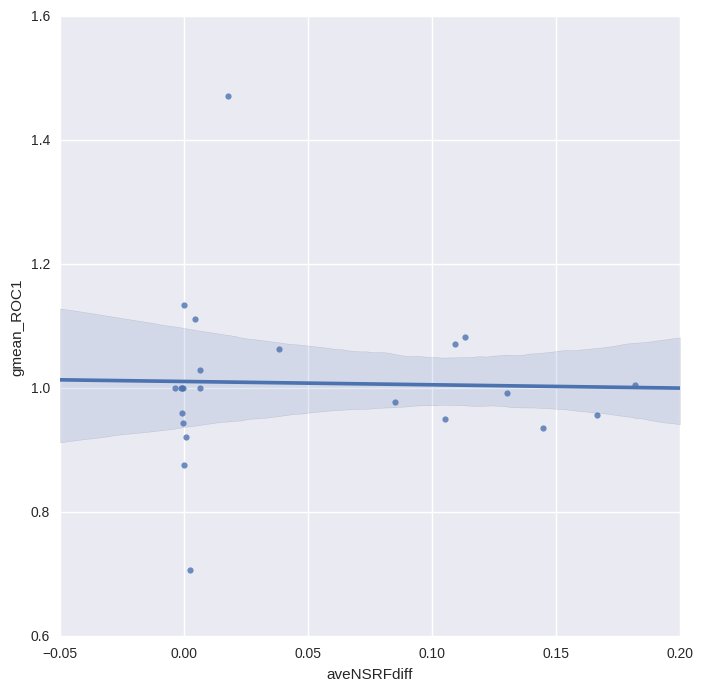

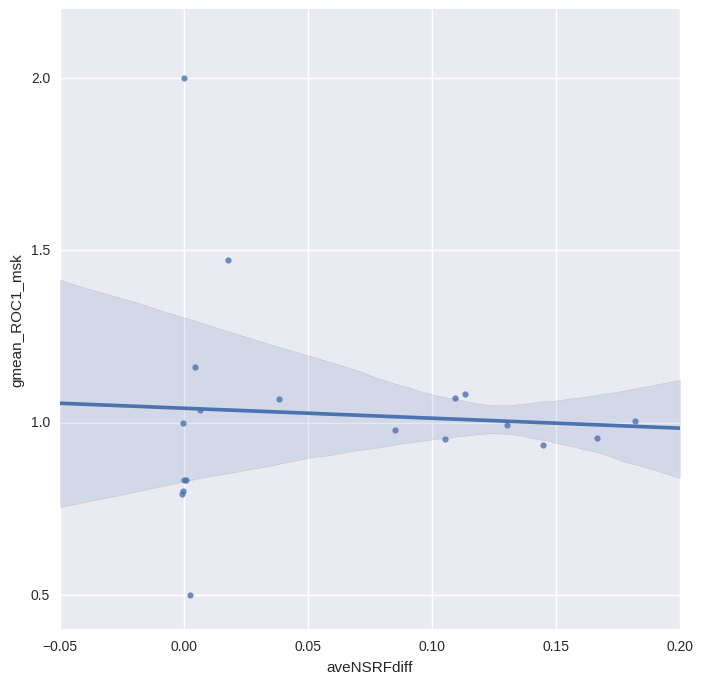

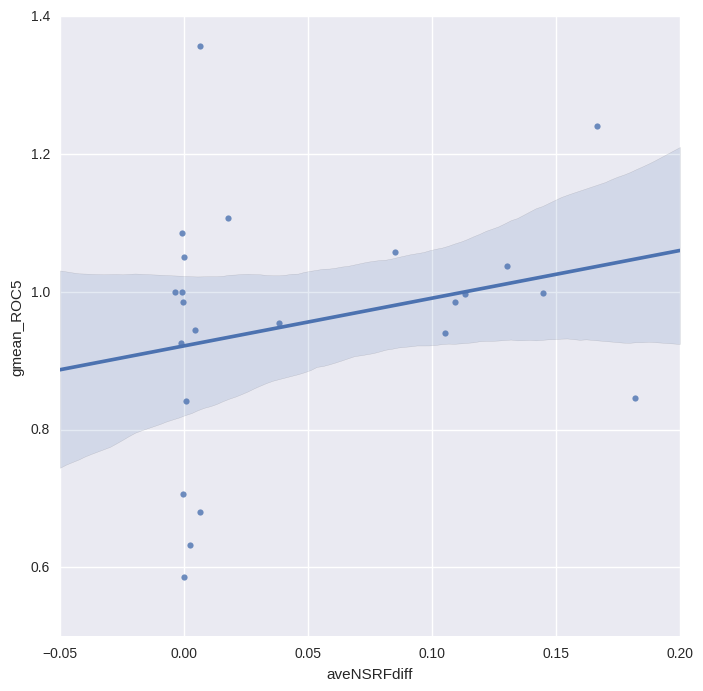

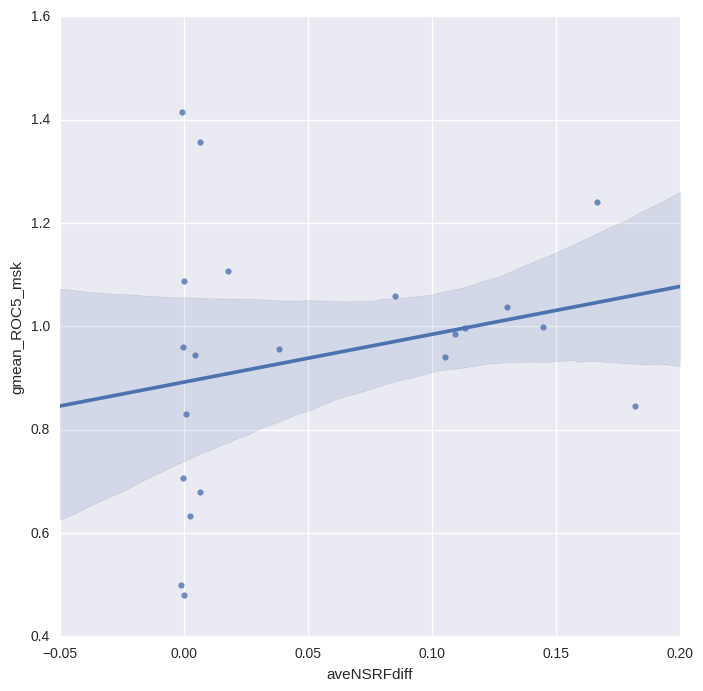

In [79]:
plt.figure(figsize=(8,8))
sns.regplot("aveNSRFdiff", "gmean_ROC1",data=out_df)
plt.show()
plt.figure(figsize=(8,8))
sns.regplot("aveNSRFdiff", "gmean_ROC1_msk",data=out_df[out_df["gmean_ROC1_msk"]>=0])
plt.show()
plt.figure(figsize=(8,8))
sns.regplot("aveNSRFdiff", "gmean_ROC5",data=out_df)
plt.show()
plt.figure(figsize=(8,8))
sns.regplot("aveNSRFdiff", "gmean_ROC5_msk",data=out_df[out_df["gmean_ROC5_msk"]>=0])
plt.show()

In [55]:
tmp_df.head()

,Organism,Dataset,fasta_type,REF,DREF,OC1,DOC1,OC5,DOC5,CON,DCON,taxid,count_real,count_sim,RREF,ROC1,ROC5,RCON,aveNSRFdiff
171,Cyanobacterium_synechocystis_PCC6803,6803_totalCys_system_iTRAQ_2Dec12_Jaguar_12-09-19,msgfplus,1552,78,0,0,0,0,39,1,1148,0.495691,0.493175,19.658228,1.0,1.0,20.00,0.002516
172,Cyanobacterium_synechocystis_PCC6803,6803_totalCys_system_iTRAQ_2Dec12_Jaguar_12-09-19,annotated,1574,79,0,0,0,0,39,1,1148,0.495691,0.493175,19.687500,1.0,1.0,20.00,0.002516
173,Cyanobacterium_synechocystis_PCC6803,6803_totalCys_system_iTRAQ_2Dec12_Jaguar_12-09-19,ocelot166,1570,78,0,0,1,1,39,1,1148,0.495691,0.493175,19.886076,1.0,1.0,20.00,0.002516
174,Cyanobacterium_synechocystis_PCC6803,Synechocystis_01_Run1_8Sep11_Doc_11-07-35,msgfplus,6076,309,0,0,0,0,165,3,1148,0.495691,0.493175,19.603226,1.0,1.0,41.50,0.002516
175,Cyanobacterium_synechocystis_PCC6803,Synechocystis_01_Run1_8Sep11_Doc_11-07-35,annotated,6144,311,0,0,0,0,164,3,1148,0.495691,0.493175,19.695513,1.0,1.0,41.25,0.002516
